# Making a CMD for your Star Cluster

This notebook introduces a few commands that you'll need to make the Color Magnitude Diagram for your star cluster. You can also use the cells below to write code for your unit project.

## .loc[ ] indexing

In [ ]:
import pandas as pd

In [ ]:
# Here we create a sample dataframe
sample_df = pd.DataFrame({"Smartphone": ["iPhone 11", "Samsung Galaxy S20", "Google Pixel 4", "LG V60", "Nokia 9", "Sony Xperia 1", "iPhone SE"], "Price": [700,1000,800,700,450,1000,399]})
sample_df

,Smartphone,Price
0,iPhone 11,700
1,Samsung Galaxy S20,1000
2,Google Pixel 4,800
3,LG V60,700
4,Nokia 9,450
5,Sony Xperia 1,1000
6,iPhone SE,399


You can use the .loc index method to select all the items in one column which have a particular value in the second column. For example, we may want to select all items from the "Smartphone" column that have a value of 700 in the "Price" column.


Follow along with the **live coding activity** to see how this works.

In [ ]:
# This code selects all values from the first column, "Smartphone" where the value on that same row in the second column, "Price" is equal to 700
sample_df["Smartphone"].loc[sample_df["Price"] == 700]

0    iPhone 11
3       LG V60
Name: Smartphone, dtype: object

In [ ]:
#another way to do it using variables
#smartphone = sample_df["Smartphone"]
#price = sample_df["Price"]
#smartphone.loc[price == 700]

Now you try! Let's say you want to view some more expensive phones. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is equal to 1000.

In [ ]:
sample_df["Smartphone"].loc[sample_df["Price"] == 1000]

1    Samsung Galaxy S20
5         Sony Xperia 1
Name: Smartphone, dtype: object

Let's say you definitely want an iPhone of some sort, but you want to see just iPhone prices. Now select all the values from the "Price" column where the value on that same row in the "Smartphone" column contains the word "iPhone".

In [ ]:
sample_df["Price"].loc[sample_df["Smartphone"].str.contains("iPhone")]

0    700
6    399
Name: Price, dtype: int64

Let's say you're on a budget and don't want to spend more than $700 on a phone. Select all the values from the "Smartphone" column where the value on that same row in the "Price" column is less than or equal to 700.

In [ ]:
sample_df["Smartphone"].loc[sample_df["Price"] <= 700]

0    iPhone 11
3       LG V60
4      Nokia 9
6    iPhone SE
Name: Smartphone, dtype: object

#### Note: You can store these selected values in a variable, just like you've done with entire columns!

## Finding absolute magnitude

You will need to convert "G" to absolute magnitude for your CMD.

Look in the dataset for distance. Using G and distance, you can calculate absolute magnitude using the following equation:

absolute magnitude = G - 5 * log(distance) + 5

In [ ]:
# You will need to import numpy
import numpy as np


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# You can use this function in your code to find the log of distance:
#np.log10()
df = pd.read_csv("/content/drive/My Drive/oh_table.csv")
group3 = df.loc[df["group_id"] == 2]

In [ ]:
abs_magnitude = group3["G"] - 5*np.log10(group3["distance"]) + 5
abs_magnitude

276    3.117943
277    6.369445
278    4.520155
279    5.631102
280    5.734546
         ...   
389    4.942483
390    7.438620
391    6.777783
392    6.442717
393    6.773982
Length: 118, dtype: float64

### Your first task is to create a Color Magnitude Diagram for your star cluster
You can use as many of the cells below as you need. You can add new cells with the "+" button.

In [ ]:
import matplotlib.pyplot as plt


In [ ]:
#color is g-j is the x axis
#y axis is absolute magnitude
color = group3["G"] - group3["J"]


In [ ]:
import matplotlib.colors as mpl # We'll use the matplotlib.colors library to color our data points
%matplotlib inline 
#sun_abs = 

/usr/local/lib/python3.6/dist-packages/matplotlib/colors.py:1171: RuntimeWarning: invalid value encountered in less_equal
  mask |= resdat <= 0


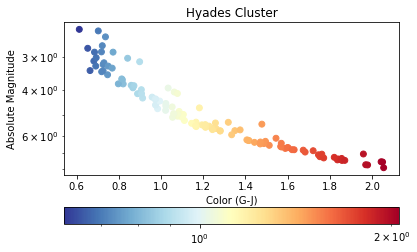

In [ ]:
cm = plt.cm.get_cmap("RdYlBu_r")# This is the colormap we'll use for our data points. Note: _r reverses the colormap
plt.scatter(color, abs_magnitude, c=color, s=35, cmap=cm, norm=mpl.LogNorm()) # This plots all our points as a scatterplot
#plt.scatter(1.48, 4.7, c='magenta', s=200, marker='*') # This plots the sun's data as a separate point with a star marker
plt.yscale('log')
plt.xlabel('Color (G-J)')
plt.ylabel('Absolute Magnitude')
plt.title('Hyades Cluster')
plt.gca().invert_yaxis() # This inverts the x axis so that the hottest stars are on the left.
plt.colorbar(orientation ="horizontal")
plt.show()

### Coding Challenge 1: Add the sun to your color magnitude diagram

### Coding Challenge 2: Add a colormap to your diagram

### Coding Challenge 3: Create histograms for the absolute magnitude and color of your star cluster

/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/usr/local/lib/python3.6/dist-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


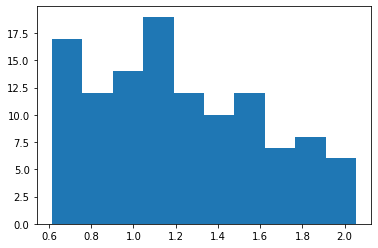

In [ ]:
plt.hist(color)
plt.show()

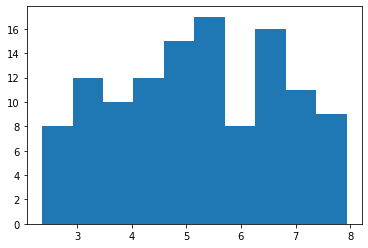

In [ ]:
plt.hist(abs_magnitude)
plt.show()